In [2]:
from ray.tune import Analysis, ExperimentAnalysis
import json
import os
import matplotlib.pyplot as plt

In [3]:
df_cols = ['accuracy', 'training_iteration', 'config/linear_attention', 'config/add_source', 'config/ode', 'config/attention_norm_idx', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads', 'config/attention_dim']

In [4]:
cols = ['accuracy', 'training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/add_source', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']

In [5]:
cols_gdc = ['accuracy', 'training_iteration', 'config/num_init', 'config/reweight_attention', 'config/gdc_k', 'config/ppr_alpha', 'config/function', 'config/block', 'config/simple', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']

In [6]:
cols_OGB = ['accuracy', 'loss','training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']

In [7]:
cols_OGB2 = ['accuracy', 'train_acc', 'loss','training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']

In [8]:
att_cols = ['accuracy', 'train_acc', 'training_iteration', 'config/num_init', 'config/kinetic_energy', 'config/directional_penalty', 'config/function', 'config/block', 'config/add_source', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale', 'config/attention_norm_idx', 'config/leaky_relu_slope', 'config/heads', 'config/attention_dim']

In [13]:
rewire_cols = ['accuracy', 'training_iteration', 'config/gdc_sparsification', 'config/gdc_method', 'config/heat_time', 'config/gdc_k', 'config/ppr_alpha', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale', 'config/attention_norm_idx', 'config/leaky_relu_slope', 'config/heads', 'config/attention_dim']

In [14]:
def get_analysis(folder, cols = df_cols):
    analysis = Analysis("../ray_tune/{}".format(folder))
    df = analysis.dataframe(metric='accuracy', mode='max')
    return df.sort_values('accuracy', ascending=False)[cols]

In [15]:
cd ../src

/home/ubuntu/workspace/graph-neural-pde/src


In [17]:
df = get_analysis('citeseer-nl-att-rewiring-splits1', rewire_cols)
df.head(50)

,accuracy,training_iteration,config/gdc_sparsification,config/gdc_method,config/heat_time,config/gdc_k,config/ppr_alpha,config/time,config/decay,config/hidden_dim,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
19,0.755072,47,topk,heat,3.760601,16,0.149712,1.136043,0.1,128,...,1,0.501141,adamax,sc,dopri5,346.244595,1,0.012687,2,128
18,0.751449,14,topk,ppr,2.326004,16,0.169714,1.583923,0.1,128,...,0,0.578793,adamax,sc,dopri5,646.908978,1,0.676805,4,64
11,0.726329,31,topk,heat,1.248923,64,0.116626,1.392791,0.1,128,...,1,0.588364,adamax,sc,dopri5,2.731140,1,0.443601,8,64
5,0.724396,16,topk,heat,2.440450,16,0.099977,1.378169,0.1,128,...,0,0.459377,adam,sc,dopri5,822.425201,1,0.397991,4,128
26,0.718599,24,topk,ppr,4.245975,32,0.015046,3.373443,0.1,128,...,1,0.238418,adam,sc,dopri5,106.898332,1,0.315809,8,128
14,0.681884,8,topk,heat,3.062063,16,0.051109,3.721318,0.1,128,...,0,0.196093,adam,sc,dopri5,9.482480,1,0.291234,4,16
2,0.679710,12,topk,ppr,2.392337,16,0.124045,5.846358,0.1,128,...,1,0.663256,adam,sc,dopri5,90.845656,1,0.571448,8,128
13,0.676087,46,topk,ppr,3.867017,64,0.115702,1.368588,0.1,128,...,1,0.334544,rmsprop,sc,dopri5,946.080700,1,0.428884,2,32
27,0.674396,10,topk,ppr,1.732181,16,0.106582,3.634141,0.1,128,...,1,0.555049,adamax,sc,dopri5,1214.986919,1,0.034513,2,128
12,0.669082,8,topk,heat,2.153815,32,0.048397,1.901180,0.1,128,...,1,0.084989,adam,sc,dopri5,2.266268,1,0.169101,4,32


In [12]:
df = get_analysis('citeseer-nl-att-rewiring', rewire_cols)
df.head(50)

,accuracy,train_acc,training_iteration,config/gdc_sparsification,config/gdc_method,config/heat_time,config/gdc_k,config/ppr_alpha,config/time,config/decay,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
766,0.735870,0.800000,48,topk,heat,3.744882,32,0.168897,1.905908,0.1,...,1,0.017187,adam,sc,dopri5,29.153743,1,0.009055,2,64
369,0.735507,0.833333,45,topk,ppr,2.102232,64,0.157227,1.753940,0.1,...,1,0.548309,adam,sc,dopri5,349.991312,1,0.099546,4,8
62,0.732971,0.858333,46,topk,heat,2.187424,64,0.190974,1.641639,0.1,...,0,0.013153,adam,sc,dopri5,117.698781,1,0.438696,2,32
550,0.732609,0.925000,48,topk,heat,2.543370,32,0.093965,1.131450,0.1,...,0,0.419602,adamax,sc,dopri5,473.655318,1,0.450767,8,8
895,0.731522,0.870833,45,topk,heat,2.141959,32,0.118581,1.476583,0.1,...,1,0.046835,adam,sc,dopri5,19.003318,1,0.427881,8,16
97,0.730072,0.850000,46,topk,ppr,3.361669,64,0.108551,1.505062,0.1,...,0,0.351907,adam,sc,dopri5,62.914410,1,0.413902,2,32
210,0.728986,0.804167,49,topk,ppr,3.844699,64,0.150728,1.712091,0.1,...,1,0.221320,adam,sc,dopri5,3.013373,1,0.485926,2,8
716,0.727536,0.745833,13,topk,ppr,3.128903,64,0.182194,1.962250,0.1,...,1,0.730043,adam,sc,dopri5,6.044945,1,0.366424,2,16
561,0.727174,0.850000,48,topk,ppr,1.556024,128,0.191594,1.616401,0.1,...,0,0.443137,adam,sc,dopri5,99.317198,1,0.418840,4,32
694,0.726812,0.908333,35,topk,ppr,1.885757,32,0.172329,1.025749,0.1,...,0,0.471589,adamax,sc,dopri5,346.374158,1,0.156381,8,8


In [14]:
df = get_analysis('citeseer-lin-att-rewiring', rewire_cols)
df.head(50)

,accuracy,train_acc,training_iteration,config/gdc_sparsification,config/gdc_method,config/heat_time,config/gdc_k,config/ppr_alpha,config/time,config/decay,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
749,0.737319,0.845833,48,topk,heat,4.975319,32,0.174285,1.659421,0.1,...,1,0.489391,adam,sc,dopri5,45.870214,1,0.015522,4,16
15,0.735507,0.870833,25,topk,heat,4.771316,32,0.199106,1.397278,0.1,...,0,0.149811,adamax,sc,dopri5,127.905496,1,0.225903,4,64
518,0.735507,0.854167,45,topk,heat,3.630113,64,0.043718,1.548735,0.1,...,0,0.539280,rmsprop,sc,dopri5,335.061440,1,0.615602,4,128
81,0.733696,0.866667,44,topk,ppr,1.380354,128,0.058549,1.339447,0.1,...,0,0.060708,adam,sc,dopri5,6.663401,1,0.558341,2,16
719,0.732971,0.895833,39,topk,heat,3.971076,32,0.028694,1.368285,0.1,...,1,0.664795,adam,sc,dopri5,19.826125,1,0.601060,4,64
90,0.732609,0.837500,49,topk,heat,1.323648,32,0.018140,1.421288,0.1,...,1,0.364247,adam,sc,dopri5,2.064122,1,0.192626,2,64
86,0.731884,0.916667,28,topk,heat,3.543184,32,0.075661,1.197854,0.1,...,1,0.393188,adamax,sc,dopri5,173.342413,1,0.217821,2,32
516,0.731884,0.875000,41,topk,ppr,1.580498,128,0.133558,1.333324,0.1,...,0,0.231880,adamax,sc,dopri5,11.434721,1,0.416560,8,64
551,0.731522,0.883333,27,topk,heat,2.743424,32,0.154980,1.110606,0.1,...,0,0.744103,rmsprop,sc,dopri5,107.363599,1,0.325301,8,32
537,0.730435,0.875000,48,topk,ppr,4.528619,64,0.130995,1.626894,0.1,...,0,0.136821,adam,sc,dopri5,7.325188,1,0.220210,2,64


In [23]:
df = get_analysis('cora-lin-att-rewiring2', rewire_cols)
df.head(50)

,accuracy,train_acc,training_iteration,config/gdc_sparsification,config/gdc_method,config/heat_time,config/gdc_k,config/ppr_alpha,config/time,config/decay,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
197,0.812132,1.000000,42,topk,heat,2.272267,32,0.05,11.786199,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
989,0.811765,0.992857,33,topk,heat,3.514339,32,0.05,14.925978,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
895,0.810294,0.989286,39,topk,heat,1.623324,16,0.05,10.256527,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
130,0.809559,0.975000,18,topk,heat,3.977268,32,0.05,6.426309,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
311,0.809559,0.996429,43,topk,heat,1.659200,16,0.05,10.805628,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
680,0.808088,0.996429,35,topk,heat,1.275555,16,0.05,6.455803,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
939,0.808088,0.996429,26,topk,heat,1.842561,64,0.05,5.789238,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
451,0.808088,0.985714,18,topk,heat,3.912198,32,0.05,5.340960,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
319,0.806985,0.996429,38,topk,heat,1.244449,32,0.05,7.908030,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
720,0.806985,0.992857,40,topk,heat,3.217865,64,0.05,8.017246,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128


In [20]:
df = get_analysis('cora-lin-att-rewiring1', rewire_cols)
df.head(50)

,accuracy,train_acc,training_iteration,config/gdc_sparsification,config/gdc_method,config/heat_time,config/gdc_k,config/ppr_alpha,config/time,config/decay,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
271,0.813971,0.996429,29,topk,heat,1.565311,32,0.025871,7.500954,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
592,0.811029,0.996429,27,topk,heat,3.000000,64,0.143074,6.880970,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
879,0.809926,0.996429,27,topk,heat,2.605505,32,0.093083,6.529292,0.017,...,1,0.1,adamax,sc,dopri5,726,0,0.14,2,128
230,0.809926,0.996429,29,topk,heat,4.826495,32,0.102284,12.028809,0.017,...,1,0.1,adamax,sc,dopri5,726,0,0.14,2,128
537,0.806985,0.978571,25,topk,heat,1.510586,64,0.050362,6.331846,0.017,...,1,0.1,adamax,sc,dopri5,726,0,0.14,2,128
940,0.806985,0.992857,29,topk,heat,2.043879,64,0.093233,6.947932,0.017,...,1,0.1,adam,sc,dopri5,726,0,0.14,2,128
21,0.806618,0.996429,21,topk,heat,4.422512,64,0.171815,6.236667,0.017,...,1,0.1,adamax,sc,dopri5,726,0,0.14,2,128
80,0.805882,0.996429,25,topk,heat,1.712040,64,0.196421,6.738251,0.017,...,1,0.1,adamax,sc,dopri5,726,0,0.14,2,128
733,0.805515,0.953571,13,topk,heat,4.564328,32,0.072826,6.003019,0.017,...,1,0.1,adamax,sc,dopri5,726,0,0.14,2,128
838,0.805515,0.989286,29,topk,heat,1.542006,32,0.094172,5.026914,0.017,...,1,0.1,adamax,sc,dopri5,726,0,0.14,2,128


In [ ]:
df = get_analysis('cora-lin-att-rewiring', rewire_cols)
df.head(50)

In [1]:
df = get_analysis('cora-lin-att-noreg', att_cols)
df.head(50)

NameError: name 'get_analysis' is not defined

In [ ]:
df = get_analysis('cora-lin-att-noreg', att_cols)
df.head(50)

In [ ]:
analysis = Analysis("../ray_tune/cora-lin-att-noreg")

In [10]:
df = get_analysis('cora-lin-att1', att_cols)
df.head(50)

,accuracy,train_acc,training_iteration,config/num_init,config/kinetic_energy,config/directional_penalty,config/function,config/block,config/add_source,config/time,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
162,0.677941,0.825000,25,2,0.027162,0.235141,laplacian,attention,False,12.834281,...,1,0.093087,adamax,sc,dopri5,304.860399,0,0.105738,4,16
198,0.675000,0.967857,30,2,0.175489,0.047348,laplacian,attention,False,15.893599,...,0,0.030174,adam,sc,dopri5,28.622353,0,0.119809,8,128
316,0.670221,0.964286,44,2,7.568528,0.002440,laplacian,attention,False,17.042681,...,1,0.032614,adamax,sc,dopri5,7.385388,0,0.530635,4,128
759,0.668382,0.821429,6,2,0.004878,0.008118,laplacian,attention,False,14.324052,...,1,0.026641,adam,sc,dopri5,33.877043,0,0.335384,8,32
311,0.668015,0.946429,35,2,1.945941,0.684557,laplacian,attention,False,12.360050,...,0,0.111126,adamax,sc,dopri5,764.501679,0,0.080715,2,16
693,0.667279,0.842857,18,2,0.001477,0.023993,laplacian,attention,False,15.740068,...,0,0.077845,adam,sc,dopri5,8.249087,0,0.350204,4,32
140,0.666544,0.885714,32,2,0.062121,0.006397,laplacian,attention,False,14.340652,...,1,0.135310,adamax,sc,dopri5,57.006152,0,0.691409,1,128
118,0.666176,0.853571,26,2,0.046508,0.245217,laplacian,attention,False,11.328219,...,1,0.033322,adam,sc,dopri5,310.484339,0,0.288199,4,64
88,0.665809,0.975000,44,2,0.002612,1.296124,laplacian,attention,False,19.843398,...,1,0.059134,adamax,sc,dopri5,11.647181,0,0.376827,2,32
221,0.665441,0.860714,30,2,0.003526,1.727833,laplacian,attention,False,17.605632,...,0,0.108888,adamax,sc,dopri5,3.102770,0,0.472422,1,64


In [11]:
df = get_analysis('cora-lin-att', att_cols)
df.head(50)

,accuracy,train_acc,training_iteration,config/num_init,config/kinetic_energy,config/directional_penalty,config/function,config/block,config/add_source,config/time,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
166,0.649816,0.837500,9,4,0.021140,0.999355,laplacian,attention,False,9.036761,...,0,0.143722,adam,sc,dopri5,6.945556,0,0.549990,8,128
152,0.645221,0.812500,9,4,0.065542,1.537164,laplacian,attention,False,19.639008,...,0,0.006888,adamax,sc,dopri5,4.255967,0,0.075547,8,64
119,0.644118,0.937500,8,4,0.014853,0.041366,laplacian,attention,False,8.625472,...,0,0.004789,adamax,sc,dopri5,1.822865,0,0.582414,8,32
72,0.626103,0.830357,7,4,0.855542,5.813430,laplacian,attention,False,8.641811,...,0,0.129986,adam,sc,dopri5,229.293789,0,0.461359,2,32
56,0.617831,0.721429,10,4,0.370863,0.008931,laplacian,attention,False,19.933289,...,0,0.090420,adamax,sc,dopri5,42.392275,0,0.042395,8,64
342,0.613603,0.789286,9,4,0.001057,0.059989,laplacian,attention,False,14.975615,...,1,0.084218,adamax,sc,dopri5,4.736291,0,0.017160,1,16
27,0.611397,0.848214,4,4,0.030286,0.165861,laplacian,attention,False,14.033805,...,1,0.034136,adam,sc,dopri5,630.766493,0,0.366388,2,16
25,0.607721,0.971429,5,4,3.077984,0.001688,laplacian,attention,False,11.168824,...,0,0.093392,adamax,sc,dopri5,10.968893,1,0.662099,8,64
283,0.606985,0.985714,5,4,0.001483,0.009542,laplacian,attention,False,5.134253,...,1,0.117230,adamax,sc,dopri5,292.099237,1,0.044666,8,32
137,0.604412,0.905357,7,4,0.015611,0.004170,laplacian,attention,False,8.396159,...,1,0.142959,adam,sc,dopri5,296.680287,0,0.367100,4,64


In [14]:
df = get_analysis('cora_linear_attention_adjoint', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
839,0.841176,8,1,laplacian,attention,True,9.467218,0.045691,128,0.090197,...,1,0.105893,adam,sc,dopri5,19.151238,0,0.021136,4,32
741,0.835294,42,1,laplacian,attention,True,9.233718,0.017205,64,0.056208,...,1,0.113497,adam,sc,dopri5,79.029124,0,0.209435,1,16
335,0.833824,9,1,laplacian,attention,True,7.028487,0.019480,64,0.168277,...,1,0.073304,adamax,sc,dopri5,199.299153,0,0.112471,1,32
515,0.833088,28,1,laplacian,attention,True,6.428322,0.039234,128,0.110913,...,1,0.022329,adamax,sc,dopri5,281.896844,0,0.010744,8,32
93,0.832353,39,1,laplacian,attention,True,7.477695,0.043330,128,0.094890,...,1,0.043805,adamax,sc,dopri5,276.501519,0,0.327346,4,64
559,0.832353,16,1,laplacian,attention,True,12.949749,0.023065,128,0.082748,...,1,0.027731,adamax,sc,dopri5,10.917066,0,0.690536,4,32
956,0.831618,6,1,laplacian,attention,True,5.437045,0.022390,128,0.063144,...,1,0.095481,adam,sc,dopri5,77.693612,0,0.336846,4,64
825,0.830147,16,1,laplacian,attention,True,11.328355,0.016335,64,0.061399,...,1,0.108459,adam,sc,dopri5,438.618765,1,0.030484,8,32
674,0.828676,7,1,laplacian,attention,True,5.325921,0.034785,64,0.082904,...,0,0.040187,adam,sc,dopri5,283.168554,0,0.209941,2,16
235,0.826471,7,1,laplacian,attention,True,13.302385,0.031721,64,0.055766,...,1,0.044246,adam,sc,dopri5,554.046401,0,0.301026,4,64


In [11]:
df = get_analysis('cora_linear_attention', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
410,0.831618,13,1,laplacian,attention,True,5.297022,0.057209,128,0.090972,...,1,0.027169,adam,sc,dopri5,27.202209,0,0.293280,2,64
146,0.829412,9,1,laplacian,attention,True,10.858463,0.033029,64,0.109510,...,1,0.077425,adamax,sc,dopri5,694.230557,0,0.160637,4,32
226,0.829412,38,1,laplacian,attention,True,10.763222,0.019052,64,0.102150,...,1,0.131322,adamax,sc,dopri5,11.385769,0,0.281495,4,64
436,0.825735,48,1,laplacian,attention,True,7.490573,0.047416,64,0.083234,...,1,0.069927,adam,sc,dopri5,2.051014,0,0.332457,8,128
183,0.825000,16,1,laplacian,attention,True,8.275382,0.022822,128,0.062261,...,1,0.037294,adamax,sc,dopri5,1.002931,1,0.430557,4,64
140,0.824265,40,1,laplacian,attention,True,5.547613,0.046842,64,0.063061,...,1,0.142149,adamax,sc,dopri5,38.328454,0,0.135554,8,64
359,0.823529,9,1,laplacian,attention,True,5.462685,0.046321,64,0.056783,...,1,0.142733,adam,sc,dopri5,56.013122,0,0.544748,2,32
388,0.822794,16,1,laplacian,attention,True,5.584894,0.054015,64,0.109935,...,0,0.095653,adamax,sc,dopri5,585.321078,0,0.589790,2,16
863,0.822059,37,1,laplacian,attention,True,11.195341,0.014807,64,0.052992,...,1,0.126694,adam,sc,dopri5,184.632991,1,0.296727,8,128
531,0.821324,36,1,laplacian,attention,True,6.209974,0.016229,64,0.103460,...,0,0.087178,adamax,sc,dopri5,13.730400,0,0.117180,8,16


In [8]:
df = get_analysis('cora_gdc_attention_reweight', cols_gdc)
df.head(50)

,accuracy,training_iteration,config/num_init,config/reweight_attention,config/gdc_k,config/ppr_alpha,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
957,0.812500,36,1,True,32,0.177514,laplacian,attention,True,5.557409,0.011904,128,0.150504,0.623852,1,0.034329,adamax,sc,dopri5,170.991647
59,0.809559,23,1,True,32,0.154845,laplacian,attention,True,5.760347,0.029723,128,0.099933,0.509392,0,0.074157,adamax,sc,dopri5,1.729994
674,0.809559,27,1,True,32,0.064599,laplacian,attention,True,5.563991,0.031203,128,0.063565,0.693345,1,0.125418,adamax,sc,dopri5,52.610847
41,0.808088,47,1,True,32,0.170348,laplacian,attention,True,5.462810,0.052585,128,0.122118,0.384186,0,0.007614,adam,sc,dopri5,1.439674
77,0.807353,16,1,True,32,0.159653,laplacian,attention,True,6.118446,0.027449,128,0.161312,0.262796,1,0.128467,adamax,sc,dopri5,1.857345
855,0.804412,39,1,True,16,0.053314,laplacian,attention,True,10.512753,0.015629,64,0.065968,0.627679,1,0.144092,adam,sc,dopri5,24.401932
750,0.804412,43,1,True,16,0.114661,laplacian,attention,True,12.789705,0.049221,128,0.067760,0.540465,1,0.093901,adam,sc,dopri5,9.851352
589,0.803676,34,1,True,16,0.144542,laplacian,attention,True,8.776032,0.015006,64,0.147922,0.543897,0,0.109967,adam,sc,dopri5,3.386989
546,0.803676,49,1,True,16,0.174922,laplacian,attention,True,5.815597,0.046707,64,0.091873,0.444450,0,0.128006,adam,sc,dopri5,117.785819
486,0.803676,49,1,True,32,0.110040,laplacian,attention,True,5.501935,0.054133,64,0.054022,0.288926,0,0.011786,adamax,sc,dopri5,71.868824


In [9]:
len(df)

659

In [8]:
df = get_analysis('cora_gdc_attention', cols_gdc)
df.head(50)

,accuracy,training_iteration,config/num_init,config/gdc_k,config/ppr_alpha,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
281,0.808824,33,1,16,0.187291,laplacian,attention,True,5.596581,0.048136,128,0.115161,0.295168,1,0.097719,adam,sc,dopri5,6.500810
313,0.808824,31,1,16,0.099755,laplacian,attention,True,6.685351,0.035283,128,0.088260,0.516838,1,0.028645,adamax,sc,dopri5,29.716782
385,0.808088,35,1,16,0.051394,laplacian,attention,True,6.838901,0.016145,64,0.142800,0.268408,1,0.054265,adam,sc,dopri5,3.763866
68,0.805882,49,1,32,0.110927,laplacian,attention,True,5.112760,0.048964,128,0.182440,0.419127,1,0.087785,adamax,sc,dopri5,21.919627
100,0.802206,18,1,64,0.173904,laplacian,attention,True,5.475997,0.042186,64,0.050422,0.694915,0,0.082302,adam,sc,dopri5,3.781094
384,0.800735,47,1,32,0.102579,laplacian,attention,True,7.118768,0.024586,64,0.182545,0.387592,1,0.149610,adamax,sc,dopri5,3.427532
406,0.799265,49,1,16,0.135041,laplacian,attention,True,5.349314,0.038774,64,0.065905,0.589325,0,0.130862,adamax,sc,dopri5,345.012228
272,0.799265,21,1,16,0.018663,laplacian,attention,True,6.357873,0.025153,64,0.050291,0.707498,1,0.009479,adam,sc,dopri5,699.523946
316,0.798529,40,1,32,0.113680,laplacian,attention,True,5.183971,0.044318,128,0.108000,0.485989,1,0.090784,adamax,sc,dopri5,7.519190
64,0.798529,16,1,64,0.108196,laplacian,attention,True,7.450335,0.026591,64,0.080123,0.692729,1,0.146466,adam,sc,dopri5,7.402942


In [14]:
df = get_analysis('cora_gdc_weights', cols_gdc)
df.head(50)

,accuracy,training_iteration,config/num_init,config/gdc_k,config/ppr_alpha,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
127,0.832353,26,1,128,0.157907,laplacian,constant,True,5.852980,0.053961,128,0.081290,0.386835,1.801089,0.127476,adam,sc,dopri5,2.039764
309,0.830147,32,1,64,0.116376,laplacian,constant,True,8.743005,0.014936,64,0.051767,0.655454,1.979927,0.013087,adam,sc,dopri5,5.881264
38,0.829412,8,1,32,0.116522,laplacian,constant,True,5.916216,0.027738,64,0.130375,0.653937,0.937127,0.009221,adamax,sc,dopri5,553.914633
498,0.829412,32,1,64,0.196098,laplacian,constant,True,15.102599,0.032273,128,0.107416,0.452858,2.538323,0.128502,adamax,sc,dopri5,74.490028
552,0.829412,49,1,64,0.192010,laplacian,constant,True,18.950321,0.020640,128,0.094303,0.415014,1.735334,0.070352,adam,sc,dopri5,497.022619
743,0.827206,32,1,128,0.141837,laplacian,constant,True,8.753190,0.019084,64,0.192742,0.545710,2.403541,0.083340,adamax,sc,dopri5,109.334765
666,0.827206,23,1,128,0.147122,laplacian,constant,True,6.735623,0.037022,128,0.079141,0.432561,0.323703,0.012171,adamax,sc,dopri5,2.105081
838,0.827206,42,1,128,0.127846,laplacian,constant,True,5.251716,0.057480,128,0.089891,0.485647,2.558542,0.037759,adam,sc,dopri5,90.696841
106,0.826471,38,1,128,0.196068,laplacian,constant,True,10.735623,0.020468,64,0.079692,0.521276,1.716770,0.140317,adamax,sc,dopri5,162.244061
152,0.826471,33,1,128,0.180102,laplacian,constant,True,10.037104,0.028382,64,0.059322,0.412287,2.503358,0.004405,adam,sc,dopri5,168.179326


In [10]:
df = get_analysis('cora_gdc_search', cols_gdc)
df.tail(50)

,accuracy,training_iteration,config/num_init,config/gdc_k,config/ppr_alpha,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
470,0.225000,9,1,128,0.018182,laplacian,constant,True,14.444946,0.084420,64,0.072164,0.386870,0.124693,0.041847,adamax,sc,dopri5,547.023635
138,0.223529,5,1,128,0.078151,laplacian,constant,True,8.319661,0.092639,64,0.119191,0.466658,0.491935,0.024318,rmsprop,sc,dopri5,5.838427
96,0.219853,10,1,128,0.130328,laplacian,constant,True,12.666567,0.090653,128,0.195451,0.677433,1.501235,0.080815,adam,sc,dopri5,6.975500
163,0.218382,5,1,32,0.026801,laplacian,constant,True,16.102089,0.093899,64,0.067785,0.568572,2.436831,0.047338,rmsprop,sc,dopri5,404.285948
4,0.216912,7,1,64,0.047935,laplacian,constant,True,17.157331,0.050717,64,0.054648,0.449192,1.730489,0.022799,rmsprop,sc,dopri5,117.974277
936,0.216176,8,1,128,0.151025,laplacian,constant,True,17.954759,0.022403,64,0.194117,0.205562,0.168442,0.097767,adamax,sc,dopri5,1.519614
753,0.215441,7,1,128,0.176976,laplacian,constant,True,17.079536,0.099496,64,0.056530,0.664663,2.527760,0.057836,adamax,sc,dopri5,1.344159
309,0.212500,8,1,128,0.071829,laplacian,constant,True,12.752544,0.069170,64,0.175685,0.733262,0.111281,0.022485,adamax,sc,dopri5,625.004442
415,0.211765,10,1,128,0.194024,laplacian,constant,True,19.477925,0.070930,64,0.061192,0.207829,2.076053,0.070612,adamax,sc,dopri5,2.935464
995,0.211765,7,1,32,0.120206,laplacian,constant,True,14.679922,0.063263,128,0.151117,0.379797,1.347877,0.099550,rmsprop,sc,dopri5,379.245080


In [7]:
df = get_analysis('cora_gdc', cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
551,0.795588,44,1,laplacian,constant,True,5.664705,0.026797,128,0.061767,0.351748,2.152810,0.016736,adamax,sc,dopri5,146.803474
817,0.795588,36,1,laplacian,constant,True,5.065228,0.044567,64,0.099785,0.302108,1.521634,0.029797,adam,sc,dopri5,5.146453
740,0.791176,45,1,laplacian,constant,True,5.226619,0.031156,64,0.060870,0.540341,0.838943,0.094380,adam,sc,dopri5,2.922393
498,0.791176,49,1,laplacian,constant,True,5.510539,0.038558,128,0.059892,0.568634,2.875502,0.018662,adam,sc,dopri5,32.303276
571,0.790441,37,1,laplacian,constant,True,5.288758,0.029304,64,0.091658,0.321165,0.863777,0.080293,adamax,sc,dopri5,1.346417
40,0.790441,49,1,laplacian,constant,True,5.742357,0.055809,64,0.069733,0.397583,1.549149,0.061597,adam,sc,dopri5,557.659583
671,0.789706,17,1,laplacian,constant,True,7.528491,0.020066,128,0.090093,0.759201,2.853596,0.100335,adamax,sc,dopri5,9.374578
477,0.789706,45,1,laplacian,constant,True,5.008966,0.052438,64,0.078902,0.387802,2.368245,0.050187,adamax,sc,dopri5,115.505446
152,0.788971,45,1,laplacian,constant,True,6.275521,0.011075,64,0.086734,0.204869,2.578469,0.049316,adamax,sc,dopri5,562.901773
215,0.788971,29,1,laplacian,constant,True,5.738497,0.017860,64,0.058582,0.676494,2.431924,0.080883,adam,sc,dopri5,13.631797


In [11]:
df = get_analysis('cora_2hop', cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
656,0.831618,10,1,laplacian,constant,True,5.314638,0.015226,64,0.107238,0.324925,2.790060,0.006993,adamax,sc,dopri5,12.501431
497,0.824265,30,1,laplacian,constant,True,5.051620,0.037077,64,0.081064,0.725891,2.812083,0.097625,adamax,sc,dopri5,3.216601
164,0.822794,39,1,laplacian,constant,True,5.860487,0.015158,128,0.052411,0.522520,1.891333,0.058876,adamax,sc,dopri5,878.189878
875,0.822059,19,1,laplacian,constant,True,5.117430,0.023874,128,0.082688,0.347893,1.170091,0.148958,adamax,sc,dopri5,428.524966
878,0.821324,34,1,laplacian,constant,True,5.319533,0.045586,64,0.056283,0.500833,1.615875,0.142717,adamax,sc,dopri5,27.834552
218,0.820588,23,1,laplacian,constant,True,7.173040,0.014494,64,0.061449,0.516907,2.936510,0.027588,adamax,sc,dopri5,12.628831
348,0.820588,41,1,laplacian,constant,True,5.342347,0.061356,64,0.091847,0.587196,2.308233,0.008200,adam,sc,dopri5,8.586561
630,0.819853,32,1,laplacian,constant,True,6.684284,0.017040,128,0.075351,0.227939,1.406483,0.066164,adam,sc,dopri5,5.759653
510,0.819118,31,1,laplacian,constant,True,5.143358,0.011200,64,0.114976,0.724850,0.668064,0.048283,adam,sc,dopri5,48.636640
839,0.818382,36,1,laplacian,constant,True,8.070656,0.031608,64,0.052715,0.683766,1.713035,0.060485,adamax,sc,dopri5,11.939462


In [7]:
df = get_analysis('cora_GAT_refactor', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
921,0.824,14,1,GAT,constant,True,5.181122,0.010977,128,0.016929,...,0,0.069394,adamax,vc,dopri5,125.196842,1,0.123458,1,16
253,0.820,32,1,GAT,constant,True,5.973845,0.033597,64,0.024581,...,1,0.021259,adamax,vc,dopri5,209.309713,0,0.508791,8,64
811,0.818,24,1,GAT,constant,True,11.978765,0.011621,128,0.008101,...,0,0.004306,adam,vc,dopri5,314.248731,1,0.175387,2,16
815,0.816,29,1,GAT,constant,True,7.019288,0.014363,64,0.006792,...,1,0.064463,adam,vc,dopri5,852.988301,0,0.540599,4,32
821,0.814,19,1,GAT,constant,True,7.870668,0.026988,128,0.030060,...,1,0.041760,adamax,vc,dopri5,6.443496,0,0.561975,8,16
256,0.814,10,1,GAT,constant,True,5.298511,0.028646,128,0.020448,...,1,0.092590,adam,vc,dopri5,555.441328,0,0.496943,8,128
110,0.814,33,1,GAT,constant,True,5.252788,0.015301,64,0.005956,...,0,0.109935,adam,vc,dopri5,295.630097,0,0.227950,8,64
98,0.814,10,1,GAT,constant,True,9.632886,0.013007,128,0.017949,...,1,0.025460,adam,vc,dopri5,249.955759,1,0.008147,8,64
525,0.814,8,1,GAT,constant,True,5.447573,0.012369,128,0.014760,...,0,0.052150,adam,vc,dopri5,106.150222,1,0.575367,4,128
845,0.812,48,1,GAT,constant,True,7.831485,0.010455,128,0.013296,...,0,0.118156,adamax,vc,dopri5,2.047087,0,0.422727,4,64


In [10]:
df = get_analysis('cora_transformer_refactor_test', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
183,0.824,23,1,transformer,constant,True,16.929610,0.012108,128,0.045482,...,0.5,0.093292,adamax,vc,dopri5,1.029171,0,0.562698,4,64
289,0.818,31,1,transformer,constant,True,7.257687,0.020405,64,0.010684,...,2.0,0.074227,adam,vc,dopri5,29.543695,0,0.016843,8,16
192,0.816,33,1,transformer,constant,True,9.882872,0.033445,128,0.015216,...,1.0,0.003052,adam,vc,dopri5,807.108875,0,0.164257,2,128
297,0.816,15,1,transformer,constant,True,12.703849,0.018751,128,0.041553,...,2.0,0.078399,adamax,vc,dopri5,6.255503,0,0.153021,2,128
591,0.816,44,1,transformer,constant,True,5.951271,0.019084,64,0.016871,...,0.5,0.099475,adam,vc,dopri5,43.543426,1,0.632791,8,16
172,0.814,28,1,transformer,constant,True,7.984167,0.011075,128,0.022581,...,1.0,0.096525,adam,vc,dopri5,44.797003,0,0.273452,4,16
467,0.814,44,1,transformer,constant,True,10.059350,0.012056,64,0.030638,...,0.5,0.081257,adamax,vc,dopri5,146.582077,0,0.431801,2,64
189,0.814,36,1,transformer,constant,True,10.437851,0.010589,64,0.044443,...,0.5,0.069856,adam,vc,dopri5,108.715743,0,0.171258,8,64
318,0.814,21,1,transformer,constant,True,10.541247,0.032503,64,0.025462,...,2.0,0.051026,adam,vc,dopri5,290.521729,1,0.679026,1,32
675,0.812,23,1,transformer,constant,True,7.246906,0.020265,128,0.024978,...,2.0,0.131085,adamax,vc,dopri5,16.534680,1,0.368639,8,128


In [20]:
df = get_analysis('cora_mixed_block_refactor_test', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
696,0.824,33,1,laplacian,mixed,True,10.799867,0.014320,64,0.020221,...,0.5,0.055533,adamax,vc,dopri5,172.780629,1,0.521814,4,64
382,0.824,30,1,laplacian,mixed,True,11.001167,0.017972,64,0.012282,...,0.5,0.024660,adam,vc,dopri5,47.982625,1,0.291530,8,64
472,0.822,35,1,laplacian,mixed,True,15.073066,0.011134,128,0.023923,...,0.5,0.086966,adamax,vc,dopri5,22.299628,1,0.226988,4,128
443,0.822,21,1,laplacian,mixed,True,15.161808,0.021822,64,0.038363,...,2.0,0.025545,adamax,vc,dopri5,758.391005,1,0.371783,4,64
212,0.820,21,1,laplacian,mixed,True,9.396730,0.015000,64,0.029513,...,2.0,0.028915,adamax,vc,dopri5,40.570957,1,0.203090,8,128
322,0.820,44,1,laplacian,mixed,True,19.964383,0.012147,128,0.011028,...,0.5,0.092182,adam,vc,dopri5,213.904934,1,0.635699,8,64
240,0.820,33,1,laplacian,mixed,True,12.323182,0.026395,64,0.033311,...,1.0,0.041664,adamax,vc,dopri5,23.615610,1,0.634417,1,128
576,0.818,45,1,laplacian,mixed,True,12.852851,0.030223,128,0.016757,...,1.0,0.023485,adam,vc,dopri5,786.631151,1,0.146416,4,32
232,0.818,47,1,laplacian,mixed,True,16.584825,0.010669,64,0.021750,...,2.0,0.075197,adamax,vc,dopri5,743.788887,1,0.168366,4,16
947,0.818,17,1,laplacian,mixed,True,11.530097,0.027058,128,0.018825,...,0.5,0.097299,adam,vc,dopri5,15.652376,1,0.182505,8,32


In [18]:
df = get_analysis('cora_attention_block_refactor_test', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
711,0.824,10,1,laplacian,attention,True,7.452918,0.013322,64,0.027807,...,2.0,0.098524,adam,vc,dopri5,756.980160,1,0.449870,2,128
610,0.820,34,1,laplacian,attention,True,5.549802,0.010268,128,0.041897,...,0.0,0.064428,adamax,vc,dopri5,541.415872,0,0.138004,8,32
645,0.820,14,1,laplacian,attention,True,12.291188,0.020008,64,0.036515,...,2.0,0.143105,adamax,vc,dopri5,637.749526,1,0.202771,8,64
729,0.820,45,1,laplacian,attention,True,9.815393,0.020474,128,0.025997,...,2.0,0.055543,adamax,vc,dopri5,9.499480,1,0.415936,1,32
901,0.818,20,1,laplacian,attention,True,13.332709,0.026369,128,0.025851,...,1.0,0.025938,adam,vc,dopri5,179.348555,1,0.230122,8,16
719,0.818,21,1,laplacian,attention,True,9.581015,0.037022,128,0.036139,...,2.0,0.108739,adamax,vc,dopri5,3.427068,1,0.232052,1,32
634,0.818,44,1,laplacian,attention,True,10.011075,0.020602,128,0.043866,...,2.0,0.080929,adamax,vc,dopri5,2.530399,1,0.128172,8,32
848,0.818,20,1,laplacian,attention,True,5.701104,0.012607,64,0.011071,...,0.0,0.030332,adam,vc,dopri5,5.702727,1,0.561757,4,16
18,0.818,17,1,laplacian,attention,True,9.664929,0.015267,64,0.025565,...,0.5,0.031018,adamax,vc,dopri5,62.425272,1,0.401077,1,128
409,0.818,31,1,laplacian,attention,True,19.939860,0.026993,128,0.017574,...,1.0,0.060695,adam,vc,dopri5,20.408673,1,0.696368,8,32


In [11]:
cols = ['accuracy', 'training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/simple', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']
df = get_analysis('cora_refactor_test', cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
246,0.824,42,1,laplacian,constant,True,13.008026,0.014578,128,0.009825,0.286546,2.0,0.019665,adam,vc,dopri5,373.221023
835,0.822,47,1,laplacian,constant,True,11.769411,0.015655,128,0.019685,0.641981,1.0,0.077348,adamax,vc,dopri5,8.556895
503,0.822,31,1,laplacian,constant,True,13.663087,0.024482,128,0.032550,0.309156,0.5,0.081287,adamax,vc,dopri5,193.655467
775,0.822,35,1,laplacian,constant,True,15.810700,0.016521,128,0.014481,0.310725,0.5,0.093455,adamax,vc,dopri5,3.819824
591,0.822,28,1,laplacian,constant,True,18.214935,0.015123,128,0.044220,0.463724,0.5,0.144581,adamax,vc,dopri5,22.295442
47,0.820,33,1,laplacian,constant,True,16.687836,0.010054,64,0.015493,0.443310,2.0,0.007603,adam,vc,dopri5,2.278911
129,0.820,22,1,laplacian,constant,True,10.232833,0.014134,128,0.006626,0.206596,1.0,0.018173,adam,vc,dopri5,36.730818
481,0.820,37,1,laplacian,constant,True,15.176533,0.021374,128,0.019925,0.418223,2.0,0.061642,adam,vc,dopri5,516.621973
551,0.820,44,1,laplacian,constant,True,17.673170,0.012687,128,0.027615,0.754962,2.0,0.107546,adam,vc,dopri5,1.944837
501,0.820,43,1,laplacian,constant,True,13.417777,0.011884,128,0.014793,0.496951,1.0,0.123586,adamax,vc,dopri5,102.352905


In [10]:
df = get_analysis('cora_mix_att_fixed', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
516,0.803,41,False,True,ode,0,7.685505,0.017653,128,0.046301,0.606975,2.0,0.007680,adamax,vc,dopri5,228.957152,0.374941,4,64
405,0.798,14,False,True,ode,0,5.387446,0.013703,64,0.030620,0.776249,1.0,0.028857,adamax,vc,dopri5,379.486521,0.557911,4,64
698,0.795,34,False,True,ode,0,5.993574,0.017918,128,0.005998,0.641607,2.0,0.121569,rmsprop,vc,dopri5,3.009341,0.198148,4,64
140,0.791,33,False,True,ode,0,7.177051,0.017259,128,0.034042,0.212534,2.0,0.133127,adam,vc,dopri5,108.819295,0.251113,4,64
577,0.790,38,False,True,ode,0,5.864191,0.018927,64,0.005575,0.205273,2.0,0.022788,rmsprop,vc,dopri5,52.036925,0.236723,4,64
209,0.790,33,False,True,ode,0,5.200746,0.010252,64,0.023635,0.552334,1.0,0.057281,adamax,vc,dopri5,2.761884,0.087752,4,64
613,0.789,45,False,True,ode,0,7.178822,0.015996,128,0.036229,0.581402,1.0,0.049619,adamax,vc,dopri5,1.538148,0.346335,4,64
540,0.788,34,False,True,ode,0,9.446243,0.013987,128,0.006834,0.704788,2.0,0.010128,adam,vc,dopri5,9.047071,0.315249,4,64
399,0.787,49,False,True,ode,0,5.280008,0.010484,64,0.006110,0.645941,1.0,0.080742,adam,vc,dopri5,18.034230,0.493561,4,64
848,0.787,31,False,True,ode,0,5.218748,0.020422,64,0.031948,0.465955,1.0,0.029542,adam,vc,dopri5,618.825156,0.316581,4,64


In [17]:
df = get_analysis('cora_linear_att1', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
37,0.8045,6,True,True,ode,1,10.063998,0.010270,128,0.025713,0.764285,1,0.037639,adamax,vc,dopri5,34.773530,0.183414,4,32
77,0.8035,29,True,True,ode,1,10.286751,0.030276,128,0.008302,0.662690,1,0.080342,adam,vc,dopri5,1.104994,0.494055,1,16
30,0.8035,31,True,True,ode,1,5.980195,0.019180,64,0.008271,0.757558,0,0.080386,adam,vc,dopri5,533.030843,0.305521,2,32
20,0.8030,37,True,True,ode,0,9.980151,0.014177,64,0.048068,0.249717,0,0.024033,adamax,vc,dopri5,312.776217,0.445767,8,128
89,0.8025,19,True,True,ode,1,8.887431,0.011958,128,0.035467,0.622497,0,0.073194,adamax,vc,dopri5,1.071839,0.122803,4,128
109,0.8025,15,True,True,ode,1,7.447451,0.016149,64,0.032970,0.790719,0,0.074675,adamax,vc,dopri5,13.686089,0.523261,8,32
43,0.8020,14,True,True,ode,1,11.098052,0.027749,128,0.030812,0.649955,1,0.089239,adamax,vc,dopri5,221.633224,0.240003,8,16
36,0.8015,15,True,True,ode,1,9.361800,0.023656,128,0.009323,0.691331,0,0.068221,adam,vc,dopri5,1.305902,0.475960,2,32
95,0.7995,9,True,True,ode,1,5.928655,0.010937,64,0.016582,0.759745,0,0.051576,adam,vc,dopri5,42.319796,0.609926,8,32
134,0.7985,28,True,True,ode,0,5.335460,0.020557,64,0.019750,0.407743,0,0.124758,adamax,vc,dopri5,533.480722,0.339419,2,128


In [22]:
df = get_analysis('cora_linear_att')
df.head(50)

,accuracy,training_iteration,config/simple,config/ode,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
957,0.856,25,False,ode,19.263254,0.004229,128,0.003075,0.637508,1,0.218963,adam,vc,dopri5,4.120889,0.603534,2,16
966,0.855,22,False,ode,6.998325,0.005767,32,0.007109,0.510130,0,0.445020,adamax,vc,dopri5,23.815483,0.479066,8,128
710,0.855,30,False,ode,8.604309,0.005672,32,0.004437,0.733438,0,0.446769,adam,vc,dopri5,3.412958,0.187468,8,16
428,0.854,41,False,ode,9.287396,0.003734,128,0.002863,0.550477,0,0.440886,adam,vc,dopri5,2621.489323,0.207225,2,64
811,0.854,41,False,ode,19.198002,0.003829,128,0.002923,0.739035,0,0.224864,adam,vc,dopri5,362.523682,0.427363,4,128
876,0.853,14,False,ode,12.182285,0.008129,64,0.009234,0.740053,1,0.246603,adamax,vc,dopri5,547.163244,0.045975,8,64
795,0.850,15,False,ode,16.555648,0.009109,128,0.005371,0.586411,1,0.207849,adam,vc,dopri5,3.971421,0.369059,2,32
258,0.850,37,False,ode,9.950902,0.002557,64,0.002374,0.782614,0,0.118221,rmsprop,vc,dopri5,198.351039,0.484535,8,32
454,0.850,20,False,ode,18.082506,0.002103,128,0.002558,0.722196,0,0.053461,adamax,vc,dopri5,4.166829,0.139172,4,128
220,0.849,43,False,ode,16.829336,0.006801,64,0.002352,0.786893,1,0.360733,adam,vc,dopri5,2.067506,0.146289,8,32


In [20]:
df = get_analysis('cora_mix_att_lap1', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
132,0.816,42,False,True,ode,0,9.757078,0.013752,64,0.010642,0.595210,0.0,0.039429,adam,vc,dopri5,12.680011,0.204610,4,64
639,0.813,42,False,True,ode,0,11.965740,0.013453,128,0.024848,0.637203,0.0,0.088653,adamax,vc,dopri5,7.484291,0.060469,4,64
437,0.809,42,False,True,ode,0,6.627659,0.026027,128,0.005825,0.371895,0.0,0.090651,adam,vc,dopri5,4.629969,0.020212,4,64
651,0.808,46,False,True,ode,0,16.807283,0.012657,64,0.021507,0.734655,0.0,0.132103,adamax,vc,dopri5,2.203239,0.142562,4,64
681,0.808,26,False,True,ode,0,7.641704,0.025163,128,0.046951,0.474645,0.0,0.030657,adamax,vc,dopri5,26.362736,0.554162,4,64
286,0.807,49,False,True,ode,0,9.150768,0.018963,128,0.028601,0.313015,0.0,0.119476,adam,vc,dopri5,41.106881,0.240080,4,64
594,0.806,46,False,True,ode,0,19.925626,0.014342,128,0.046921,0.551312,0.0,0.095621,adamax,vc,dopri5,17.498363,0.459101,4,64
7,0.806,43,False,True,ode,0,7.872225,0.020859,128,0.008752,0.503600,0.0,0.072541,adam,vc,dopri5,6.906799,0.462056,4,64
499,0.805,45,False,True,ode,0,6.806802,0.021708,64,0.017470,0.320523,0.0,0.145767,adam,vc,dopri5,81.757398,0.084906,4,64
485,0.805,48,False,True,ode,0,6.163817,0.014439,64,0.007027,0.731899,0.0,0.088299,adamax,vc,dopri5,12.102845,0.481243,4,64


In [14]:
df = get_analysis('cora_mix_att_lap', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
734,0.8115,24,True,True,ode,0,5.034579,0.030557,128,0.013724,0.577378,0,0.121305,adam,vc,dopri5,40.108586,0.699575,8,64
44,0.8070,48,True,True,ode,0,5.338890,0.011290,128,0.041961,0.756109,0,0.029153,adamax,vc,dopri5,6.743395,0.699586,4,8
815,0.8055,32,True,True,ode,0,6.630646,0.016027,64,0.015949,0.771916,0,0.088609,adam,vc,dopri5,1.764674,0.372616,4,32
151,0.8035,32,True,True,ode,0,5.805029,0.015716,64,0.014573,0.373812,0,0.011834,adam,vc,dopri5,214.444100,0.555345,4,128
708,0.8035,47,True,True,ode,0,6.993096,0.023868,128,0.010973,0.533098,0,0.010260,adam,vc,dopri5,449.560624,0.293992,8,128
533,0.8020,42,True,True,ode,0,7.009480,0.017633,64,0.007695,0.598565,0,0.013501,adam,vc,dopri5,985.559778,0.233359,4,128
534,0.8020,49,True,True,ode,0,6.637091,0.019639,128,0.006550,0.685936,0,0.113039,adam,vc,dopri5,1.208735,0.042396,4,128
616,0.8015,22,True,True,ode,0,5.063993,0.050540,128,0.033351,0.518578,0,0.128150,adam,vc,dopri5,171.861102,0.019493,2,16
466,0.8015,44,True,True,ode,0,5.257857,0.019375,128,0.009241,0.666102,0,0.103703,adam,vc,dopri5,4.493543,0.621071,8,128
148,0.8010,8,True,True,ode,0,7.318932,0.011191,64,0.027713,0.547460,0,0.004699,adam,vc,dopri5,145.743980,0.266685,4,32


In [19]:
df = get_analysis('pubmed_linear_att_gp15_adjoint', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
17,0.7660,23,True,True,ode,0,16.947567,0.002493,64,0.021770,0.469988,0,0.356480,adam,vc,dopri5,1.465467,0.574708,2,16
28,0.7565,49,True,True,ode,0,9.467933,0.002546,32,0.014709,0.471460,0,0.011374,adamax,vc,dopri5,596.049194,0.537896,8,64
9,0.7465,10,True,True,ode,1,6.435382,0.002372,128,0.004566,0.335818,1,0.143592,rmsprop,vc,dopri5,587.892808,0.257164,2,16
16,0.7385,45,True,True,ode,0,17.095167,0.008786,16,0.023170,0.283313,1,0.159911,adam,vc,dopri5,183.596692,0.109119,1,64
20,0.7070,11,True,True,ode,0,11.210857,0.007490,64,0.005716,0.319480,0,0.231515,adam,vc,dopri5,1859.622589,0.602421,2,128
26,0.7030,15,True,True,ode,0,16.092763,0.003220,64,0.013236,0.206294,1,0.479999,adamax,vc,dopri5,27.499035,0.734408,1,128
25,0.6965,14,True,True,ode,0,13.884438,0.007852,16,0.002947,0.293876,1,0.414179,rmsprop,vc,dopri5,2363.768482,0.247380,4,128
7,0.6875,10,True,True,ode,0,16.776715,0.002915,32,0.020028,0.410985,1,0.000369,rmsprop,vc,dopri5,2.547346,0.306556,2,32
4,0.6425,12,True,True,ode,0,17.712403,0.002956,16,0.033434,0.267260,0,0.426393,rmsprop,vc,dopri5,347.408957,0.282819,8,16
18,0.5675,15,True,True,ode,1,14.087770,0.006589,128,0.009683,0.303066,1,0.434309,adam,vc,dopri5,24.852619,0.321284,1,64


In [5]:
df = get_analysis('citeseer_linear_att_gp15_adjoint', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
132,0.729,20,True,False,ode,1,11.270092,0.006649,128,0.002573,0.581731,1,0.760301,rmsprop,vc,dopri5,15.188618,0.394326,4,16
62,0.725,9,True,False,ode,0,10.041195,0.002757,32,0.007207,0.739463,1,0.578119,adamax,vc,dopri5,45.447023,0.395433,4,128
225,0.725,28,True,False,ode,0,9.882741,0.006202,64,0.006829,0.743101,0,0.641376,rmsprop,vc,dopri5,55.050719,0.165974,2,128
123,0.722,15,True,True,ode,0,7.907330,0.007327,32,0.000704,0.721450,1,0.582770,rmsprop,vc,dopri5,536.876014,0.315121,8,128
203,0.722,15,True,True,ode,0,11.424664,0.004810,128,0.000694,0.634337,1,0.439501,adam,vc,dopri5,627.054097,0.594722,8,32
11,0.722,9,True,True,ode,1,17.287487,0.003834,64,0.003070,0.578936,1,0.711115,rmsprop,vc,dopri5,9762.782325,0.314235,2,32
213,0.721,5,True,True,ode,0,9.316063,0.006260,128,0.001576,0.664975,1,0.299667,adam,vc,dopri5,151.474198,0.546208,4,16
266,0.720,26,True,True,ode,0,13.702249,0.009532,32,0.003202,0.664136,0,0.652539,adam,vc,dopri5,230.540506,0.382596,8,128
279,0.719,14,True,False,ode,0,16.481720,0.003669,64,0.003138,0.477280,1,0.547959,rmsprop,vc,dopri5,216.962148,0.619853,8,32
245,0.719,12,True,False,ode,0,12.959526,0.002082,32,0.001888,0.795805,0,0.511253,rmsprop,vc,dopri5,740.061593,0.462270,4,64


<AxesSubplot:xlabel='config/attention_norm_idx'>

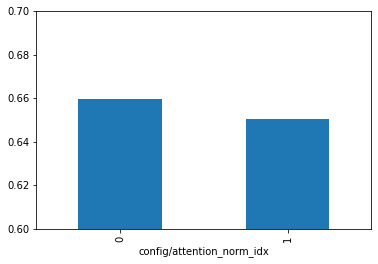

In [13]:
df.groupby(['config/attention_norm_idx'])['accuracy'].mean().plot.bar(ylim=[0.6,0.7])

<AxesSubplot:xlabel='config/simple'>

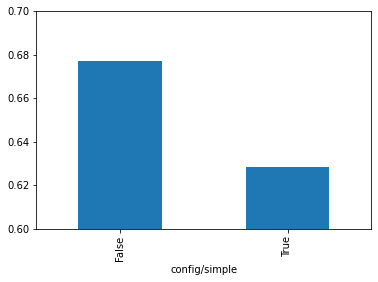

In [14]:
df.groupby(['config/simple'])['accuracy'].mean().plot.bar(ylim=[0.6,0.7])

<AxesSubplot:xlabel='config/attention_dim'>

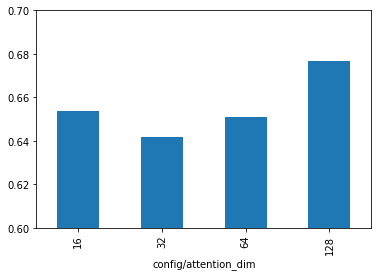

In [15]:
df.groupby(['config/attention_dim'])['accuracy'].mean().plot.bar(ylim=[0.6,0.7])

<AxesSubplot:xlabel='config/optimizer'>

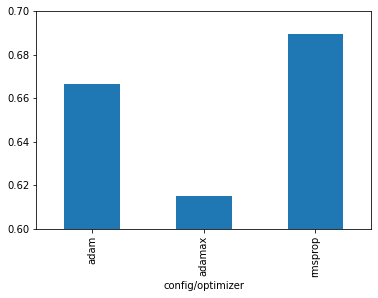

In [18]:
df.groupby(['config/optimizer'])['accuracy'].mean().plot.bar(ylim=[0.6,0.7])

In [15]:
df = get_analysis('citeseer_linear_att_gp15', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
142,0.731,5,True,True,ode,0,11.228949,0.003900,128,0.003316,0.669372,1,0.270932,adamax,vc,dopri5,424.892241,0.086900,8,32
11,0.731,44,True,True,ode,1,8.391221,0.006788,128,0.005416,0.694346,1,0.617471,rmsprop,vc,dopri5,3644.457086,0.430092,4,32
243,0.729,5,True,True,ode,0,9.419232,0.007714,64,0.001324,0.696873,1,0.227410,rmsprop,vc,dopri5,4119.963678,0.316074,2,128
495,0.728,26,True,True,ode,1,6.337568,0.006476,128,0.002277,0.425912,0,0.597366,rmsprop,vc,dopri5,66.199207,0.562118,4,16
728,0.728,38,True,False,ode,1,6.317033,0.009683,128,0.001380,0.693602,0,0.740352,adam,vc,dopri5,5178.980167,0.663055,2,32
984,0.727,30,True,True,ode,0,8.762279,0.009213,128,0.001500,0.528718,1,0.623055,adam,vc,dopri5,284.676088,0.538951,4,32
606,0.726,20,True,False,ode,1,14.783291,0.003307,128,0.000957,0.551848,0,0.651583,rmsprop,vc,dopri5,37.169919,0.047907,2,32
90,0.725,11,True,True,ode,1,9.270641,0.003599,128,0.002182,0.676235,1,0.506925,rmsprop,vc,dopri5,56.721992,0.461394,4,32
835,0.725,26,True,False,ode,1,19.112722,0.003057,64,0.004319,0.520288,0,0.002281,adam,vc,dopri5,23.094661,0.559203,2,64
150,0.724,4,True,True,ode,0,18.949195,0.009088,128,0.001149,0.578865,1,0.714051,rmsprop,vc,dopri5,5556.714064,0.542770,4,16


In [13]:
df = get_analysis('citeseer_linear_att', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
137,0.727,4,True,False,ode,0,17.736218,0.006896,128,0.004899,0.499652,0,0.798528,adamax,vc,dopri5,13.126296,0.267804,4,32
1005,0.724,3,True,False,ode,0,16.933753,0.003826,64,0.005750,0.529547,1,0.484771,adamax,vc,dopri5,890.798094,0.276291,2,32
602,0.723,4,True,True,ode,0,6.006851,0.008824,32,0.005000,0.570016,1,0.725719,rmsprop,vc,dopri5,92.998892,0.223527,2,128
164,0.723,16,True,True,ode,0,14.079085,0.008368,32,0.001062,0.577313,1,0.487144,rmsprop,vc,dopri5,1082.907137,0.234612,4,64
803,0.723,7,True,True,ode,0,12.274066,0.007066,128,0.001189,0.437968,1,0.211471,adam,vc,dopri5,42.185093,0.240564,2,64
222,0.722,5,True,False,ode,0,19.863864,0.002772,64,0.004198,0.590143,1,0.599605,adamax,vc,dopri5,377.023696,0.099868,4,16
598,0.722,12,True,True,ode,0,5.494328,0.008618,128,0.002594,0.582553,1,0.550638,adam,vc,dopri5,638.764485,0.693255,4,16
327,0.721,8,True,True,ode,0,5.943970,0.008505,128,0.002564,0.754150,1,0.006892,adam,vc,dopri5,20.305525,0.579892,2,64
746,0.721,3,True,True,ode,0,7.343665,0.005120,64,0.001831,0.683539,1,0.669498,rmsprop,vc,dopri5,42.480409,0.555805,4,16
736,0.720,4,True,True,ode,0,16.478333,0.005113,64,0.002639,0.659116,1,0.065036,rmsprop,vc,dopri5,3566.132253,0.600510,8,64


In [9]:
df = get_analysis('refactor_test')
df.head(50)

,accuracy,training_iteration,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
60,0.855,16,False,ode,1,13.600120,0.005024,128,0.002306,0.605859,0,0.027824,adamax,vc,dopri5,660.852309,0.633148,8,32
189,0.855,32,False,ode,1,19.408723,0.002176,128,0.005697,0.524821,0,0.266938,adamax,vc,dopri5,212.705462,0.654457,8,64
828,0.854,39,False,ode,1,7.631843,0.005507,128,0.003391,0.693599,0,0.106117,adamax,vc,dopri5,2586.834479,0.403966,8,16
760,0.854,19,False,ode,1,13.554850,0.008848,64,0.004447,0.732173,0,0.161928,adam,vc,dopri5,1.712721,0.337695,8,64
938,0.853,28,False,ode,1,14.103493,0.005312,128,0.002347,0.701446,1,0.265031,adamax,vc,dopri5,1586.892285,0.654746,4,64
795,0.852,25,False,ode,1,13.508983,0.009319,64,0.003533,0.550717,0,0.075157,adam,vc,dopri5,1.037079,0.405319,8,128
457,0.851,33,False,ode,1,19.547624,0.003564,32,0.005732,0.634060,0,0.239633,adamax,vc,dopri5,3738.750833,0.613991,8,64
55,0.851,48,False,ode,1,11.926777,0.005938,128,0.002573,0.738225,0,0.041409,adamax,vc,dopri5,4029.016675,0.053431,2,64
505,0.850,34,False,ode,1,19.095287,0.002285,128,0.002871,0.504693,1,0.280640,adam,vc,dopri5,4.582332,0.500332,2,16
577,0.850,38,False,ode,1,9.831523,0.004753,32,0.008193,0.740643,0,0.265295,adamax,vc,dopri5,960.780178,0.445018,8,32


In [6]:
df = get_analysis('cora_att_mix_features')
df.head(50)

,accuracy,training_iteration,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
110,0.788,11,att,0,5.652620,0.002017,64,0.002993,0.728780,1,0.143256,adam,vc,vc,True,dopri5,10.931140,0.300347,4,128
480,0.782,47,att,0,7.691057,0.007416,128,0.001475,0.536593,1,0.251843,rmsprop,vc,vc,True,dopri5,144.882743,0.197576,2,64
405,0.777,32,att,0,6.062769,0.007348,128,0.004000,0.674261,1,0.353828,adam,vc,vc,True,dopri5,63.522863,0.393082,2,64
420,0.771,49,att,0,5.838687,0.009978,128,0.003232,0.634799,1,0.201899,adamax,vc,vc,True,dopri5,4702.819226,0.659119,2,128
329,0.766,49,att,0,5.616978,0.004039,128,0.002517,0.686518,0,0.400562,adamax,vc,vc,True,dopri5,1543.391384,0.666213,8,128
435,0.765,37,att,0,5.279682,0.005259,128,0.003284,0.758679,0,0.379987,adam,vc,vc,True,dopri5,1348.963731,0.639803,4,128
78,0.756,50,att,0,5.993477,0.008048,128,0.005827,0.772853,0,0.069820,adamax,vc,vc,True,dopri5,692.612443,0.296758,4,64
667,0.753,49,att,0,7.153112,0.007053,128,0.006350,0.514534,1,0.477496,adamax,vc,vc,True,dopri5,41.940589,0.448481,8,16
91,0.741,49,att,0,5.292536,0.003993,128,0.002828,0.725207,1,0.010786,rmsprop,vc,vc,True,dopri5,990.737818,0.239750,2,32
428,0.734,48,att,0,5.908603,0.008108,64,0.001362,0.674528,1,0.344596,rmsprop,vc,vc,True,dopri5,141.500024,0.628827,2,16


In [7]:
df = get_analysis('cora_transformer_mix_features')
df.head(50)

,accuracy,training_iteration,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
189,0.778,44,transformer_att,0,5.197594,0.003238,128,0.003307,0.663318,0,0.490121,adamax,vc,vc,True,dopri5,4905.490935,0.509181,2,128
815,0.752,48,transformer_att,0,6.465167,0.005332,64,0.001912,0.772470,1,0.125454,adam,vc,vc,True,dopri5,15.749485,0.658440,2,128
242,0.720,39,transformer_att,0,11.489684,0.005059,64,0.001544,0.608321,1,0.275703,adam,vc,vc,True,dopri5,4.157313,0.465499,2,64
299,0.709,47,transformer_att,0,6.061941,0.005654,64,0.001935,0.590619,0,0.499053,adam,vc,vc,True,dopri5,35.958774,0.002453,2,64
200,0.701,49,transformer_att,0,5.639886,0.002724,16,0.005706,0.595916,1,0.352376,adamax,vc,vc,True,dopri5,36.603819,0.365805,2,64
213,0.662,34,transformer_att,0,11.637736,0.003821,64,0.004144,0.785707,0,0.185078,adam,vc,vc,True,dopri5,14.685625,0.034860,2,16
829,0.631,42,transformer_att,0,10.661954,0.002619,128,0.001073,0.788295,1,0.097633,adamax,vc,vc,True,dopri5,3.705788,0.637611,2,128
56,0.535,45,transformer_att,0,5.461572,0.005873,128,0.001072,0.651474,1,0.454769,rmsprop,vc,vc,True,dopri5,940.893684,0.110507,2,128
130,0.528,47,transformer_att,0,16.154921,0.008750,32,0.001989,0.517307,0,0.416956,adam,vc,vc,True,dopri5,363.292997,0.445075,2,64
828,0.492,27,transformer_att,1,5.576188,0.007317,16,0.006689,0.750119,0,0.027139,adamax,vc,vc,True,dopri5,490.363759,0.551966,2,64


In [8]:
df = get_analysis('cora_transformer_norm_idx')
df.head(50)

,accuracy,training_iteration,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/ode,config/attention_dim
121,0.839,43,1,5.342002,0.006749,128,0.001299,0.759066,0,0.060674,rmsprop,vc,vc,True,dopri5,287.477476,0.516003,2,transformer_att,16
82,0.833,12,1,5.644401,0.002090,64,0.001987,0.759460,1,0.042812,rmsprop,vc,vc,True,dopri5,4.677169,0.381464,2,transformer_att,32
97,0.828,42,1,9.752781,0.009128,16,0.002625,0.700161,1,0.391760,rmsprop,vc,vc,True,dopri5,3.865082,0.390722,2,transformer_att,64
66,0.826,38,0,9.737068,0.005392,64,0.004372,0.741098,0,0.206387,adam,vc,vc,True,dopri5,1617.828452,0.111679,8,transformer_att,32
29,0.824,22,0,7.832326,0.003043,128,0.006889,0.540479,1,0.263371,adamax,vc,vc,True,dopri5,5957.174433,0.366766,4,transformer_att,16
74,0.820,13,1,13.900191,0.007766,64,0.001676,0.732950,1,0.004522,rmsprop,vc,vc,True,dopri5,6.914694,0.169988,4,transformer_att,64
43,0.816,18,0,8.984778,0.003153,128,0.001510,0.666993,1,0.132805,rmsprop,vc,vc,True,dopri5,96.590472,0.204755,8,transformer_att,64
113,0.815,10,0,11.161904,0.006193,64,0.006717,0.650595,0,0.223188,adamax,vc,vc,True,dopri5,47.003733,0.513941,2,transformer_att,64
37,0.813,17,0,6.441441,0.008783,32,0.001073,0.695869,1,0.034480,rmsprop,vc,vc,True,dopri5,121.136184,0.046484,2,transformer_att,16
27,0.800,12,1,13.157846,0.002453,64,0.007573,0.747065,1,0.203953,adam,vc,vc,True,dopri5,55.534234,0.340155,4,transformer_att,32


In [18]:
df = get_analysis('cora_att_dim')
print(len(df[df['config/attention_dim']==256]))
df.head(50)

11


,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/ode,config/attention_dim
197,0.833,22,6.725151,0.002595,128,0.005259,0.668834,1,0.172984,adam,vc,vc,True,dopri5,256.642467,0.265069,2,transformer_att,16
302,0.832,19,9.436339,0.002658,32,0.002079,0.600319,0,0.056661,rmsprop,vc,vc,True,dopri5,81.870110,0.372477,2,transformer_att,64
448,0.832,38,10.045297,0.002003,32,0.001553,0.719962,0,0.394084,rmsprop,vc,vc,True,dopri5,1907.922859,0.565542,4,transformer_att,128
700,0.830,44,10.817964,0.007905,128,0.005731,0.790337,1,0.084618,adam,vc,vc,True,dopri5,2411.752754,0.623684,2,transformer_att,128
872,0.827,29,10.311412,0.003031,128,0.001154,0.785433,1,0.407455,rmsprop,vc,vc,True,dopri5,7.187396,0.297694,2,transformer_att,32
148,0.826,29,5.440710,0.009484,128,0.008659,0.647236,1,0.495637,adamax,vc,vc,True,dopri5,5.122810,0.205446,2,transformer_att,128
780,0.825,27,11.749374,0.003319,128,0.004109,0.747253,1,0.233583,adam,vc,vc,True,dopri5,1314.319955,0.040001,4,att,64
831,0.825,35,12.638970,0.003020,64,0.001879,0.684199,1,0.104394,rmsprop,vc,vc,True,dopri5,82.706898,0.111144,4,transformer_att,16
597,0.825,40,7.099710,0.005673,128,0.001637,0.720920,1,0.428970,rmsprop,vc,vc,True,dopri5,1510.946950,0.567710,8,transformer_att,256
821,0.824,31,8.337821,0.003274,64,0.004462,0.530637,1,0.121973,adam,vc,vc,True,dopri5,7.145862,0.233125,8,transformer_att,32


In [45]:
df = get_analysis('cora_transformer_mh')
df.head(50)

,accuracy,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
473,0.833,1.0,22,8.428713,0.004343,16,0.003818,0.719204,0,0.371022,rmsprop,vc,vc,True,dopri5,4.482005,0.022853,4
712,0.832,1.0,3,6.730762,0.005247,128,0.002080,0.625201,0,0.361991,rmsprop,vc,vc,True,dopri5,451.394128,0.117821,4
577,0.832,1.0,47,6.607719,0.003196,128,0.009560,0.727204,0,0.048629,adam,vc,vc,True,dopri5,923.915113,0.252433,2
72,0.830,1.0,23,11.515854,0.002275,128,0.005238,0.661208,1,0.346793,adam,vc,vc,True,dopri5,4808.175389,0.692550,8
486,0.829,1.0,39,13.242548,0.002368,128,0.004471,0.648762,1,0.120535,adamax,vc,vc,True,dopri5,23.529885,0.514937,2
146,0.829,1.0,21,6.234344,0.005101,32,0.002355,0.793213,1,0.185628,rmsprop,vc,vc,True,dopri5,8304.711714,0.342142,4
858,0.828,1.0,13,13.014622,0.008457,128,0.001159,0.796477,1,0.047277,rmsprop,vc,vc,True,dopri5,1076.142428,0.420398,2
275,0.828,1.0,37,9.702590,0.003367,64,0.005070,0.668953,1,0.072535,adamax,vc,vc,True,dopri5,7704.567065,0.496682,4
365,0.828,1.0,20,7.225773,0.007796,64,0.002103,0.735680,1,0.091631,rmsprop,vc,vc,True,dopri5,2530.536154,0.581919,4
553,0.828,1.0,33,11.098023,0.002560,128,0.003616,0.609472,1,0.354870,adam,vc,vc,True,dopri5,86.857421,0.631467,4


In [40]:
df = get_analysis('cora_transformer_adjoint')
df.head(50)

,accuracy,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
26,0.826,1055.418658,48,7.492686,0.007462,32,0.008811,0.604116,1,0.161117,adam,vc,vc,True,dopri5,7.483022,0.419735,5
90,0.824,423.781564,49,9.509379,0.006708,64,0.005307,0.753360,0,0.081021,adam,vc,vc,True,dopri5,358.635423,0.121762,3
40,0.819,125.974818,35,12.067874,0.004022,32,0.007092,0.551061,1,0.136512,adam,vc,vc,True,dopri5,15.523095,0.108833,1
17,0.815,4323.386410,44,11.410621,0.009497,64,0.006343,0.698125,1,0.010132,adam,vc,vc,True,dopri5,269.983217,0.133449,1
0,0.814,223.385114,23,10.092461,0.002761,64,0.007045,0.589183,1,0.193075,adam,vc,vc,True,dopri5,1519.786233,0.348725,10
16,0.814,47.698559,16,9.772073,0.002180,64,0.003164,0.563411,1,0.270322,adam,vc,vc,True,dopri5,186.041812,0.132795,9
89,0.810,1186.953877,24,5.080560,0.002735,64,0.004612,0.608352,1,0.061884,adam,vc,vc,True,dopri5,48.019705,0.411059,8
81,0.806,3887.668788,7,12.570614,0.004083,64,0.006337,0.729292,0,0.081625,adam,vc,vc,True,dopri5,10.549197,0.496803,1
84,0.805,4067.502211,21,14.048834,0.002447,16,0.007706,0.524593,0,0.229608,adam,vc,vc,True,dopri5,12.099929,0.554074,10
65,0.804,80183.131421,49,5.688087,0.004358,64,0.001466,0.791276,1,0.091549,adam,vc,vc,True,dopri5,504.244994,0.137786,3


In [21]:
cols = ['accuracy', 'training_iteration', 'config/simple', 'config/ode', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads']
df = get_analysis('cora_transformer', cols)
df.head(50)

,accuracy,training_iteration,config/simple,config/ode,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
139,0.863,9,True,ode,9.588650,0.009912,128,0.005408,0.736114,0,0.267104,adam,dopri5,16.368486,0.397431,8
518,0.860,10,True,ode,9.316640,0.005142,128,0.005245,0.782875,1,0.201339,adam,dopri5,1.803632,0.045701,9
810,0.859,44,True,ode,15.934325,0.004966,64,0.003193,0.663018,0,0.282958,adam,dopri5,605.786976,0.552450,3
851,0.857,13,True,ode,17.235751,0.005114,64,0.002337,0.759148,1,0.001657,adam,dopri5,21.457710,0.125340,5
903,0.856,27,True,ode,16.686392,0.007334,32,0.004570,0.554591,1,0.011814,adam,dopri5,54.055116,0.299053,8
366,0.855,44,True,ode,16.876461,0.007342,64,0.002007,0.572594,1,0.292978,adam,dopri5,1035.931775,0.098836,1
310,0.855,16,True,ode,12.352493,0.002286,128,0.002600,0.675593,1,0.235371,adam,dopri5,1.516177,0.659322,8
804,0.855,31,True,ode,9.864025,0.008395,128,0.002607,0.645921,0,0.175585,adam,dopri5,2327.047543,0.549800,11
680,0.855,11,True,ode,17.702808,0.008646,64,0.004591,0.664541,1,0.000216,adam,dopri5,259.019840,0.672229,9
408,0.852,12,True,ode,11.932387,0.007457,128,0.002613,0.697063,0,0.114152,adam,dopri5,729.068909,0.600964,7


In [7]:
df = get_analysis('pubmed_transformer')
df.head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
6,0.780,38,10.718516,0.002081,64,0.031896,0.543604,0,0.349475,adam,vc,vc,True,dopri5,1.054087,0.472804,9
13,0.758,44,5.825743,0.003185,64,0.008253,0.480095,0,0.282447,adam,vc,vc,True,dopri5,454.399797,0.536533,1
18,0.755,49,7.201342,0.005670,64,0.002952,0.530991,1,0.187575,rmsprop,vc,vc,True,dopri5,4287.416007,0.730529,8
5,0.745,49,9.440127,0.002045,16,0.011991,0.713326,0,0.521898,adam,vc,vc,True,dopri5,6.601381,0.391600,2
4,0.652,3,6.785455,0.006933,64,0.018321,0.415594,1,0.127588,adamax,vc,vc,True,dopri5,4.358722,0.420769,7
0,0.611,3,5.467200,0.005408,32,0.015529,0.481667,1,0.424570,rmsprop,vc,vc,True,dopri5,434.132693,0.526676,5
14,0.597,4,7.766020,0.003266,32,0.002146,0.704784,1,0.768214,rmsprop,vc,vc,True,dopri5,2.756411,0.266723,9
16,0.589,4,16.402101,0.004806,128,0.008099,0.769010,1,0.536643,adam,vc,vc,True,dopri5,3.036159,0.628930,5
12,0.585,2,14.799589,0.008833,32,0.018900,0.586676,1,0.731077,adamax,vc,vc,True,dopri5,5.887320,0.512370,5
2,0.491,5,16.251039,0.006421,32,0.013312,0.428264,1,0.570371,adamax,vc,vc,True,dopri5,1.334369,0.694036,1


In [7]:
cols = ['accuracy', 'config/adjoint', 'config/tol_scale_adjoint', 'training_iteration', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 
           'config/beta_dim', 'config/alpha_sigmoid', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads']
df = get_analysis('citeseer_transformer', cols)
df.head(50)

,accuracy,config/adjoint,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
786,0.732,False,1.0,25,7.723841,0.006784,64,0.001483,0.636404,0,0.775328,rmsprop,vc,vc,True,dopri5,31.787157,0.667220,9
687,0.729,False,1.0,35,8.723342,0.005112,64,0.002979,0.738117,1,0.560368,rmsprop,vc,vc,True,dopri5,217.143421,0.613573,2
715,0.726,False,1.0,25,8.577238,0.002144,64,0.008450,0.414473,0,0.752324,adam,vc,vc,True,dopri5,414.887364,0.644931,3
470,0.724,False,1.0,25,9.977886,0.009573,64,0.002718,0.408772,1,0.315300,adam,vc,vc,True,dopri5,412.820587,0.426814,6
939,0.724,False,1.0,20,6.340214,0.006582,64,0.007243,0.597222,0,0.525606,adam,vc,vc,True,dopri5,981.345426,0.616233,3
956,0.724,False,1.0,16,9.267258,0.008678,64,0.001851,0.695669,0,0.538983,rmsprop,vc,vc,True,dopri5,708.326285,0.301584,1
355,0.724,False,1.0,5,9.724947,0.003237,32,0.007520,0.695384,1,0.506355,adamax,vc,vc,True,dopri5,150.100583,0.213976,9
662,0.722,False,1.0,27,7.588916,0.009230,64,0.005239,0.651622,0,0.101548,adamax,vc,vc,True,dopri5,10.485083,0.461863,8
140,0.721,False,1.0,40,8.203648,0.003976,32,0.002104,0.751866,0,0.591843,rmsprop,vc,vc,True,dopri5,2850.495472,0.665776,4
168,0.721,False,1.0,20,5.153311,0.008967,64,0.005461,0.498503,1,0.647299,adam,vc,vc,True,dopri5,34.054551,0.004713,3


In [8]:
df = get_analysis('cora_transformer1', cols)
df.head(50)

,accuracy,config/adjoint,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
255,0.830,False,1.000000,21,10.427490,0.003867,64,0.008199,0.601544,0,0.061088,adam,vc,vc,True,dopri5,139.097009,0.378382,9
789,0.830,False,1.000000,24,6.131573,0.003156,64,0.006068,0.794005,1,0.247908,adam,vc,vc,True,dopri5,153.649866,0.300788,6
906,0.830,False,1.000000,22,6.260374,0.009078,64,0.007824,0.602181,1,0.218447,adam,vc,vc,True,dopri5,7380.276885,0.522903,1
746,0.829,False,1.000000,22,6.542574,0.003467,64,0.005417,0.776562,1,0.150353,adam,vc,vc,True,dopri5,40.233265,0.295891,3
782,0.828,False,1.000000,35,8.158548,0.002722,64,0.003307,0.637383,0,0.187667,adam,vc,vc,True,dopri5,56.814341,0.440398,2
251,0.827,True,28.243438,37,9.732311,0.002364,64,0.002969,0.602566,1,0.067379,adam,vc,vc,True,dopri5,5.647059,0.102442,11
854,0.826,False,1.000000,25,7.846449,0.002234,64,0.005962,0.657864,1,0.001325,adam,vc,vc,True,dopri5,5.487381,0.126926,5
5,0.825,False,1.000000,20,9.558722,0.002227,32,0.005873,0.690549,0,0.026367,adam,vc,vc,True,dopri5,79.201992,0.670490,2
709,0.825,False,1.000000,45,7.540293,0.004317,64,0.006900,0.688703,1,0.094388,adam,vc,vc,True,dopri5,37.631565,0.052388,4
249,0.824,False,1.000000,46,5.842503,0.009876,64,0.005857,0.563386,1,0.183344,adam,vc,vc,True,dopri5,2.183802,0.321643,2


<AxesSubplot:xlabel='config/self_loop_weight'>

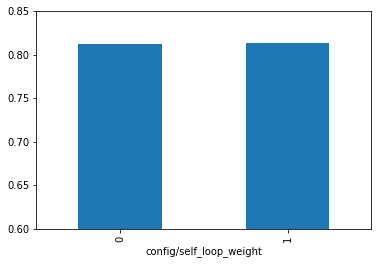

In [16]:
df[0:100].groupby(['config/self_loop_weight'])['accuracy'].mean().plot.bar(ylim=[0.6,0.85])

In [30]:
cols = ['accuracy', 'config/tol_scale_adjoint', 'config/adjoint', 'training_iteration', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 
           'config/beta_dim', 'config/alpha_sigmoid', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads']
df = get_analysis('cora_transformer', cols)
df.tail(50)

,accuracy,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
444,0.388,1.0,5,18.908827,0.005482,16,0.001481,0.659023,0,0.021661,adam,vc,vc,True,dopri5,1399.438425,0.686991,3
216,0.388,1.0,5,9.991832,0.004624,16,0.001229,0.571992,1,0.088589,adam,vc,vc,True,dopri5,37.562826,0.697349,9
202,0.385,1.0,5,11.661566,0.003761,16,0.001416,0.583458,1,0.155171,adam,vc,vc,True,dopri5,9.783036,0.128495,9
948,0.381,1.0,5,6.115115,0.003478,16,0.001154,0.724517,0,0.249501,adam,vc,vc,True,dopri5,36.045708,0.544606,9
70,0.379,1.0,5,12.506175,0.003150,16,0.001787,0.779173,0,0.151938,adam,vc,vc,True,dopri5,2175.913748,0.102026,1
798,0.378,1.0,5,11.231326,0.006018,16,0.001071,0.747485,0,0.100689,adam,vc,vc,True,dopri5,24.199907,0.399102,11
641,0.369,1.0,5,8.438508,0.002913,16,0.002176,0.780212,0,0.150110,adam,vc,vc,True,dopri5,71.112419,0.284552,6
790,0.360,1.0,5,9.026543,0.007120,16,0.002646,0.683460,0,0.292397,adam,vc,vc,True,dopri5,11.794065,0.637968,2
377,0.358,1.0,5,6.387499,0.002571,32,0.001197,0.656206,0,0.058526,adam,vc,vc,True,dopri5,140.777425,0.119158,10
779,0.358,1.0,5,18.017023,0.002226,16,0.001584,0.518228,1,0.044927,adam,vc,vc,True,dopri5,9.073504,0.221005,11
